In [15]:
import os
import sys
import glob
import random
import warnings
import shutil
from distutils.dir_util import copy_tree


import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from tqdm import tqdm
from itertools import chain
from skimage.io import imread, imshow, imread_collection, concatenate_images
from skimage.transform import resize
from skimage.morphology import label

from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.layers.core import Dropout, Lambda
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D
# from keras.layers.merge import concatenate
from keras.layers import concatenate

from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K

import tensorflow as tf
from tensorflow.keras.metrics import Metric

import skimage.io

from keras_visualizer import visualizer 

import pydot
import pydotplus
import graphviz
from tensorflow.keras.utils import plot_model

from plot_model import plot_model
# from tensorflow.python.keras.layers import wrappers

from PIL import ImageFont


In [3]:
fcnep0 = load_model('model-FCNEp=0Model_20230330.h5', custom_objects={'binary_io_u': [tf.keras.metrics.BinaryIoU(target_class_ids=[0, 1], threshold=0.3)]})
fcnep0.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 1)]     0         
                                                                 
 dense_3 (Dense)             (None, 128, 128, 64)      128       
                                                                 
 dense_4 (Dense)             (None, 128, 128, 64)      4160      
                                                                 
 dense_5 (Dense)             (None, 128, 128, 1)       65        
                                                                 
Total params: 4,353
Trainable params: 4,353
Non-trainable params: 0
_________________________________________________________________


2023-04-04 10:18:05.523693: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
unetep0 = load_model('model-UNetEp=0Model_20230330.h5', custom_objects={'binary_io_u': [tf.keras.metrics.BinaryIoU(target_class_ids=[0, 1], threshold=0.3)]})
unetep0.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 lambda_1 (Lambda)              (None, 128, 128, 1)  0           ['input_2[0][0]']                
                                                                                                  
 conv2d_19 (Conv2D)             (None, 128, 128, 16  160         ['lambda_1[0][0]']               
                                )                                                                 
                                                                                            

 conv2d_34 (Conv2D)             (None, 64, 64, 32)   9248        ['dropout_16[0][0]']             
                                                                                                  
 conv2d_transpose_7 (Conv2DTran  (None, 128, 128, 16  2064       ['conv2d_34[0][0]']              
 spose)                         )                                                                 
                                                                                                  
 concatenate_7 (Concatenate)    (None, 128, 128, 32  0           ['conv2d_transpose_7[0][0]',     
                                )                                 'conv2d_20[0][0]']              
                                                                                                  
 conv2d_35 (Conv2D)             (None, 128, 128, 16  4624        ['concatenate_7[0][0]']          
                                )                                                                 
          

In [8]:
#pip install visualkeras


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 419.2/419.2 kB 1.7 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: /Users/nadejdaboev/opt/anaconda3/envs/monaiproject_repo/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [10]:
import visualkeras

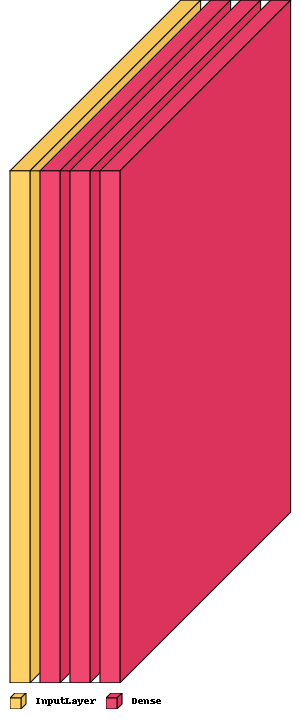

In [21]:
visualkeras.layered_view(fcnep0,legend=True, draw_volume=True, to_file='FCNModel.png')


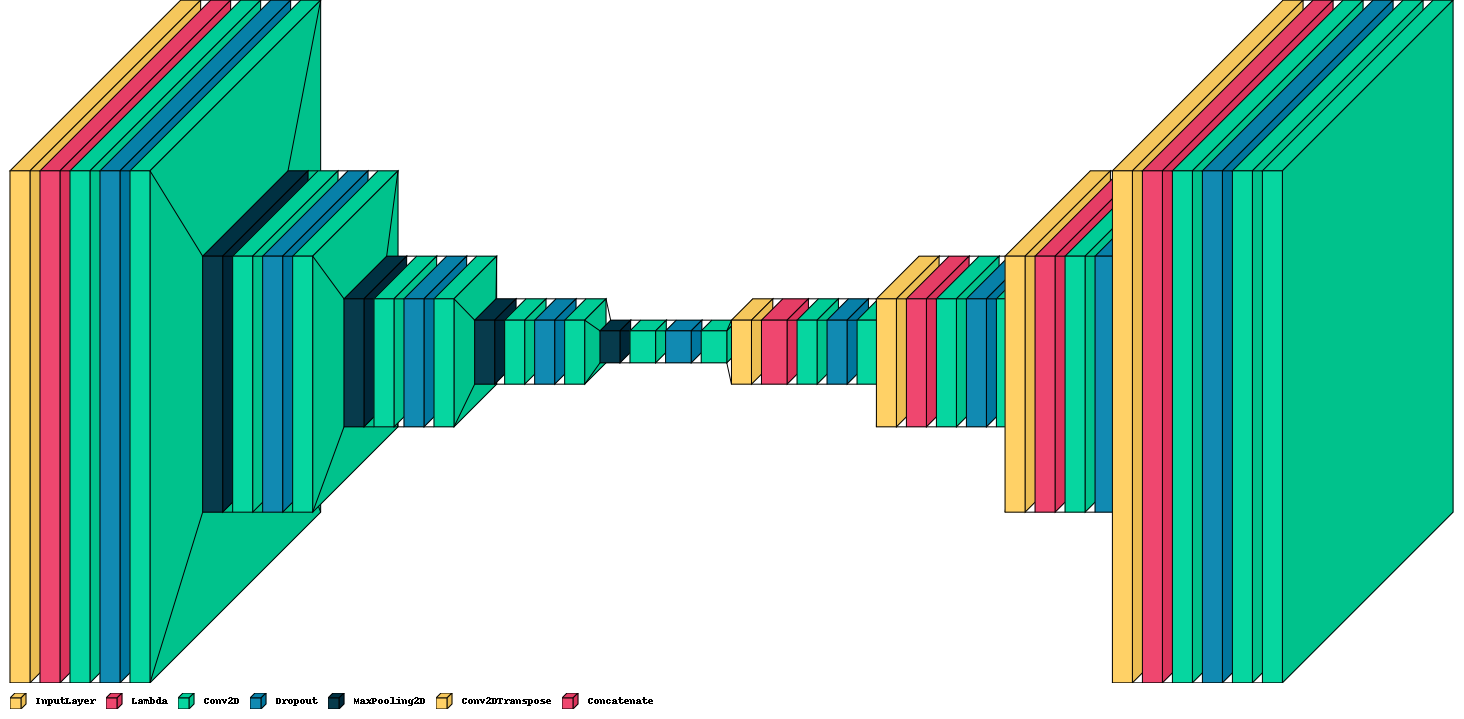

In [20]:
visualkeras.layered_view(unetep0,legend=True, draw_volume=True, to_file='U-NetModel.png')
